<a href="https://colab.research.google.com/github/abyanjan/Face-Recognition/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Recognition with Tennis Players

In [ ]:
!pip install -q face-recognition

In [ ]:
!pip install -q imutils

In [ ]:
import imutils
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
os.chdir('/content/drive/MyDrive/Computer vision/Face Recognition') 

In [ ]:
!pwd

/content/drive/MyDrive/Computer vision/Face Recognition


### Read Images and Get the Face Encodings

Here we have 5 images each for the 10 popular mens and womens Tennis Players.

In [ ]:
# grab the paths to the images of the known Tennis players in the dataset
imagePaths = list(paths.list_images('Tennis players'))

In [ ]:
imagePaths[:5]

['Tennis players/Ashleigh Barty/Ashleigh_Barty_5.jpg',
 'Tennis players/Ashleigh Barty/Ashleigh_Barty_4.jpg',
 'Tennis players/Ashleigh Barty/Ashleigh_Barty_3.jpg',
 'Tennis players/Ashleigh Barty/Ashleigh_Barty_1.jpg',
 'Tennis players/Ashleigh Barty/Ashleigh_Barty_2.jpg']

**Plot the Images of the Players**

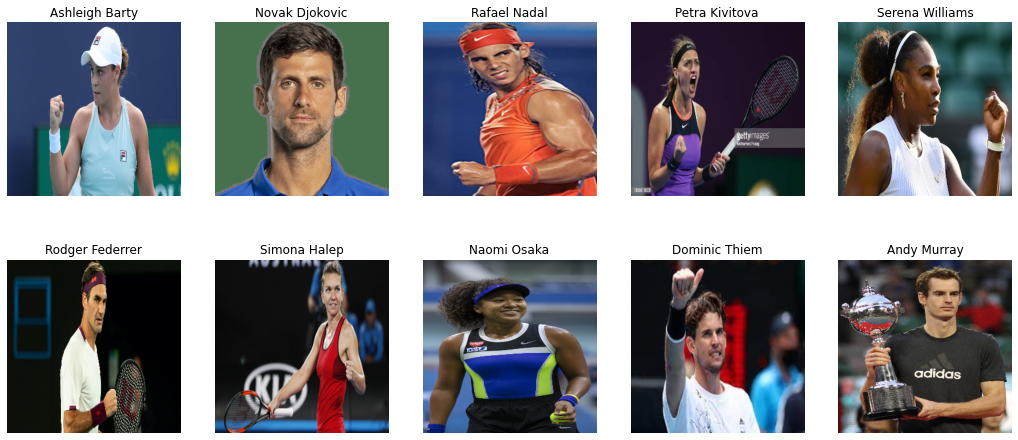

In [ ]:
# get an image of each player in the list
images = [imagePaths[i] for i in range(0, len(imagePaths), 5)]

fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (18, 8))
axes = ax.ravel()
for i in range(len(axes)):
  img = cv2.imread(images[i])
  img = cv2.resize(img, (300, 300))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  player = images[i].split('/')[1]
  axes[i].imshow(img, )
  axes[i].set_title(player)
  axes[i].axis('off')


**Get The Face Encodings**

In [ ]:
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

In [ ]:
# loop over the image paths and collect the encodings and names for the images
for (i, imagePath) in enumerate(imagePaths):
  if (i+1) % 5 == 0:
    print("[INFO] processed {}/{} images".format(i + 1,len(imagePaths)))

  # extract the players name from the image path
  name = imagePath.split(os.path.sep)[-2]
	# load the input image and convert it from BGR (OpenCV ordering)
	# to dlib ordering (RGB)
  image = cv2.imread(imagePath) 
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
 
  # detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
  boxes = face_recognition.face_locations(rgb_image, model='cnn') 
	# compute the facial embedding for the face
  encodings = face_recognition.face_encodings(rgb_image, boxes) 
	# loop over the encodings
  for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
	  knownEncodings.append(encoding)
	  knownNames.append(name)

[INFO] processed 5/50 images
[INFO] processed 10/50 images
[INFO] processed 15/50 images
[INFO] processed 20/50 images
[INFO] processed 25/50 images
[INFO] processed 30/50 images
[INFO] processed 35/50 images
[INFO] processed 40/50 images
[INFO] processed 45/50 images
[INFO] processed 50/50 images


In [ ]:
# save the facial encodings + names to disk
#print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
with open("endcodings.pkl", 'wb') as file:
  pickle.dump(data, file)


In [ ]:
#knownEncodings = None
#knownNames = None
#data = None

###Face Recognition

The face recognition is performed by comparing the face encoding of an input images with the face encodings of the known Tennis Players in the dataset.

In [ ]:
# load the saved encodings of known players
with open('endcodings.pkl','rb') as f:
  data = pickle.load(f)

In [ ]:
# create a function for face recognition in an image

def detect_player(image_path, encodings_data):

  # load the image to detect and convert it from BGR to RGB
  image = cv2.imread(image_path)
  image = imutils.resize(image, 500)
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # detect the (x, y)-coordinates of the bounding boxes corresponding
  # to each face in the input image, then compute the facial embeddings
  # for each face
  print("[INFO] recognizing faces...")
  boxes = face_recognition.face_locations(rgb_image,	model="cnn")
  encodings = face_recognition.face_encodings(rgb_image, boxes)
  # initialize the list of names for each face detected
  names = []

  # loop over the facial embeddings
  for encoding in encodings:
    # attempt to match each face in the input image to our known
    # encodings
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"

    # check to see if we have found a match
    if True in matches:
      # find the indexes of all matched faces then initialize a
      # dictionary to count the total number of times each face
      # was matched
      matchedIdxs = [i for (i, b) in enumerate(matches) if b]
      counts = {}
      # loop over the matched indexes and maintain a count for
      # each recognized face face
      for i in matchedIdxs:
        name = data["names"][i]
        counts[name] = counts.get(name, 0) + 1
      # determine the recognized face with the largest number of votes 
      name = max(counts, key=counts.get)
	
    # update the list of names
    names.append(name)

  print("[INFO] Finished recognizing faces...")
  return image, boxes, names

In [ ]:
# create function to show the results
from google.colab.patches import cv2_imshow

def show_results(image, face_bbox, names_detected):

  # loop over the recognized faces
  for ((top, right, bottom, left), name) in zip(face_bbox, names_detected):
    # draw the predicted face name on the image on only known player
    if name != "Unknown":
      cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
      y = top - 10 if top - 15 > 10 else top + 10
      cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
        0.50, (0, 255, 0), 2)
  # show the output image
  cv2_imshow(image)
  

### Prforming Face Recognition on Test Images

In [ ]:
# list the paths to test images
test_paths = list(paths.list_images("/content/Test Images/"))
#test_paths

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


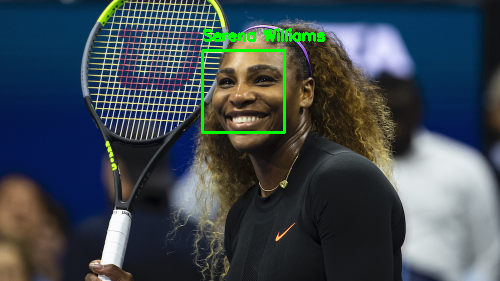

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


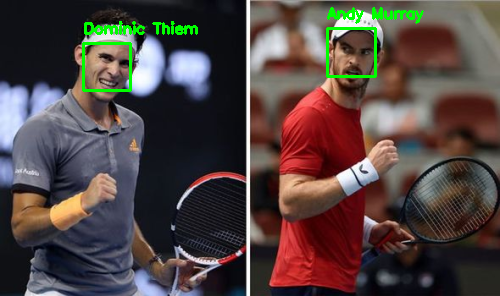

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


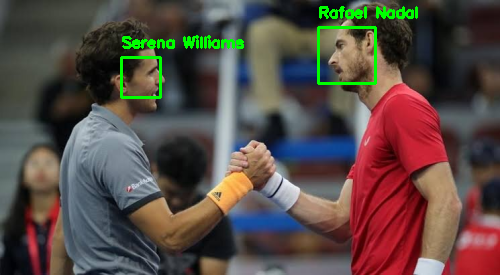

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


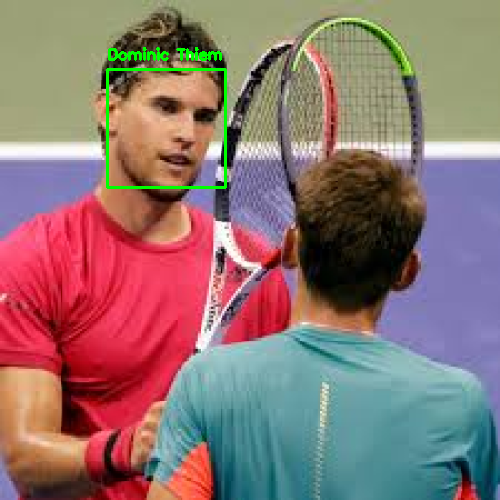

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


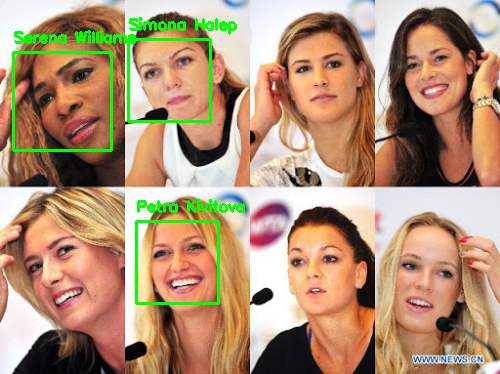

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


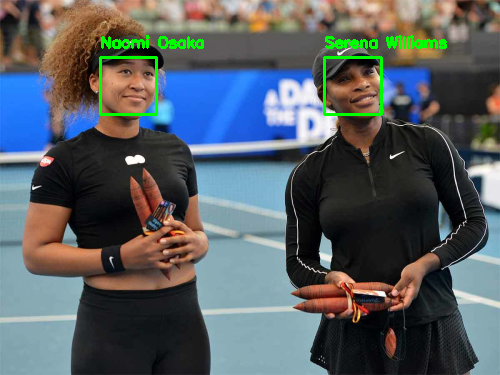

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


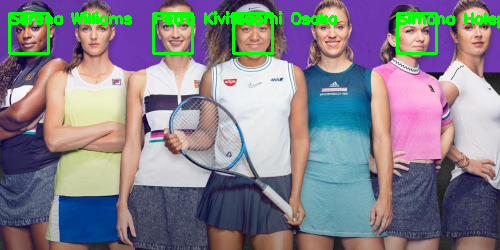

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


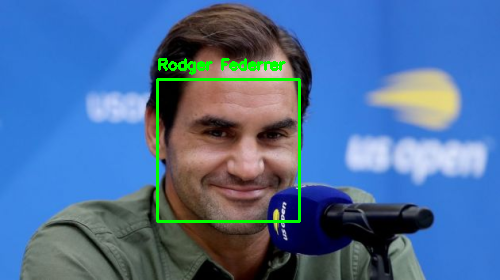

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


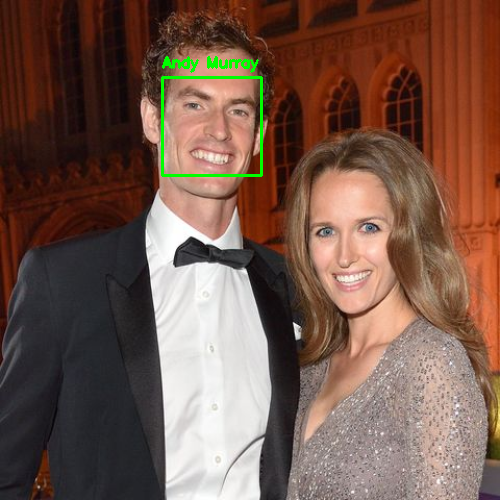

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


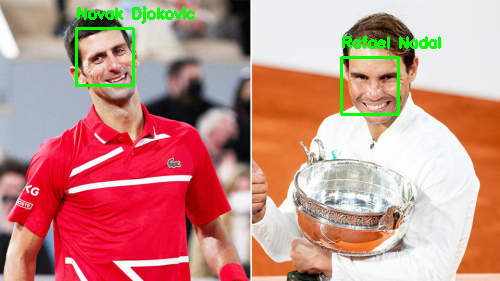

[INFO] recognizing faces...
[INFO] Finished recognizing faces...


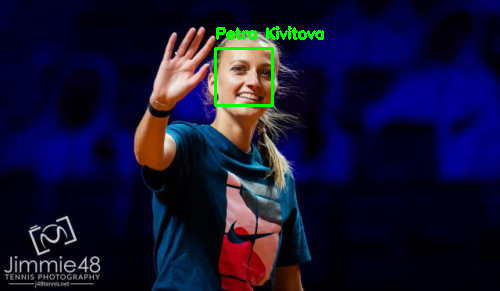

In [ ]:
for path in test_paths:
  image, boxes, names = detect_player(path, data)
  show_results(image, boxes, names)